In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import numpy as np

# Cargar datos
iris = load_iris()
X = iris.data
y = iris.target


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


A continuación visualizamos la varianza explicada acumulada. Vemos que con 3 componentes, se explica mas del 99% de la varianza, con lo que usar sólo 3 componentes en lugar de los 4 no conlleva la pérdida de mucha información. Incluso con 2 componentes ya se explica el 95% de la varianza.

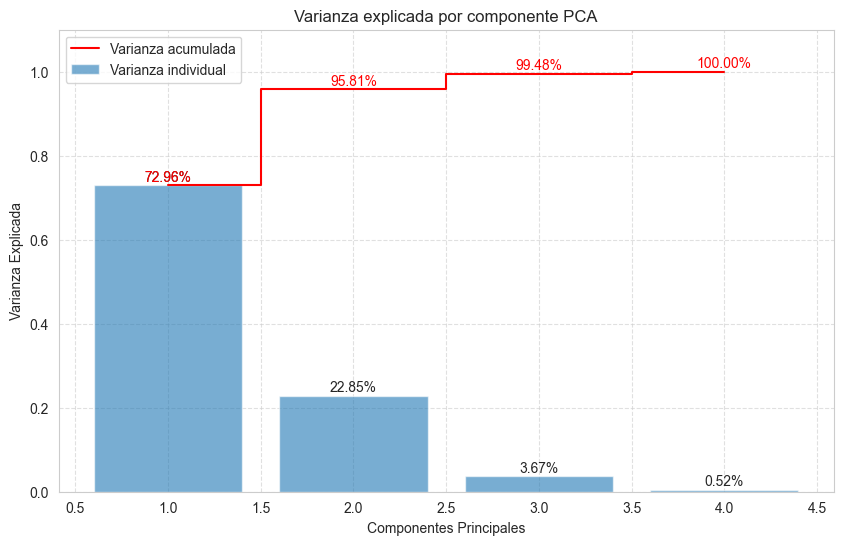

In [2]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Siempre escalar antes de PCA
    ('pca', PCA())
])

# Ajustar y transformar
X_reduced = pipeline.fit_transform(X)
pca = pipeline.named_steps['pca']

# Varianza explicada y acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# 1. Plot de Varianza Explicada y Acumulada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, label='Varianza individual')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Varianza acumulada', color='red')

# Añadir valores exactos
for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
    plt.text(i + 1, ev + 0.01, f"{ev:.2%}", ha='center')
    plt.text(i + 1, cv + 0.01, f"{cv:.2%}", ha='center', color='red')

plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza explicada por componente PCA')
plt.legend(loc='best')
plt.ylim(0, 1.1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

A continuación usamos PCA para seleccionar los 2 componentes principales, y después visualizamos el resultado.

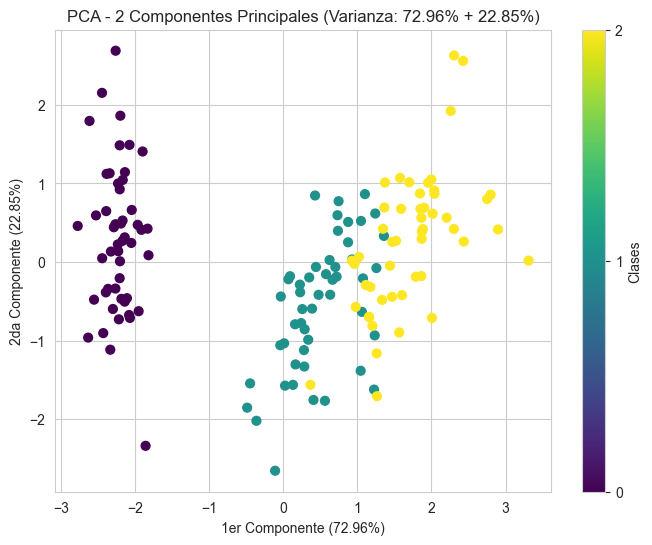

In [3]:
# Aquí usamos PCA para proyectar a 2 componentes

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Siempre escalar antes de PCA
    ('pca', PCA(n_components=2))
])

# Transformar
X_reduced = pipeline.fit_transform(X)
pca = pipeline.named_steps['pca']

# Visualizar
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=40, cmap='viridis')
plt.title('PCA - 2 Componentes Principales (Varianza: {:.2%} + {:.2%})'.format(explained_variance[0], explained_variance[1]))
plt.xlabel('1er Componente ({:.2%})'.format(explained_variance[0]))
plt.ylabel('2da Componente ({:.2%})'.format(explained_variance[1]))
plt.colorbar(ticks=range(3), label='Clases')

plt.show()

Aunque es más complicado de visualizar, también podemos seleccionar 3 componentes.

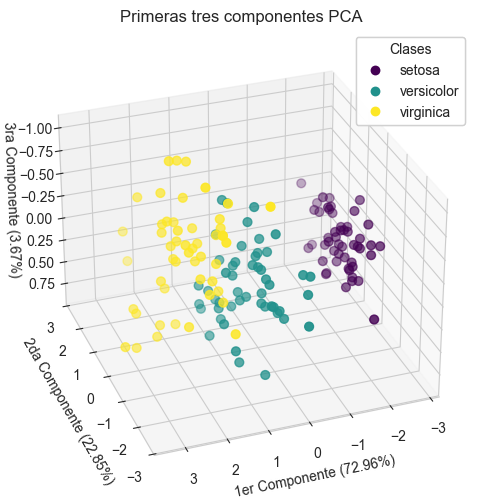

In [4]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Siempre escalar antes de PCA
    ('pca', PCA(n_components=3))
])

# Transformar
X_reduced = pipeline.fit_transform(X)
pca = pipeline.named_steps['pca']

# Visualizar
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    s=40,
    cmap='viridis'
)

ax.set(
    title="Primeras tres componentes PCA",
    xlabel="1er Componente ({:.2f}%)".format(pca.explained_variance_ratio_[0]*100),
    ylabel="2da Componente ({:.2f}%)".format(pca.explained_variance_ratio_[1]*100),
    zlabel="3ra Componente ({:.2f}%)".format(pca.explained_variance_ratio_[2]*100)
)

# Leyenda
legend1 = ax.legend(
    scatter.legend_elements()[0],
    iris.target_names.tolist(),
    loc="upper right",
    title="Clases"
)
ax.add_artist(legend1)

plt.show()